### Let the battle begin!

#### Importing the weapons and the ammunition for the battle

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


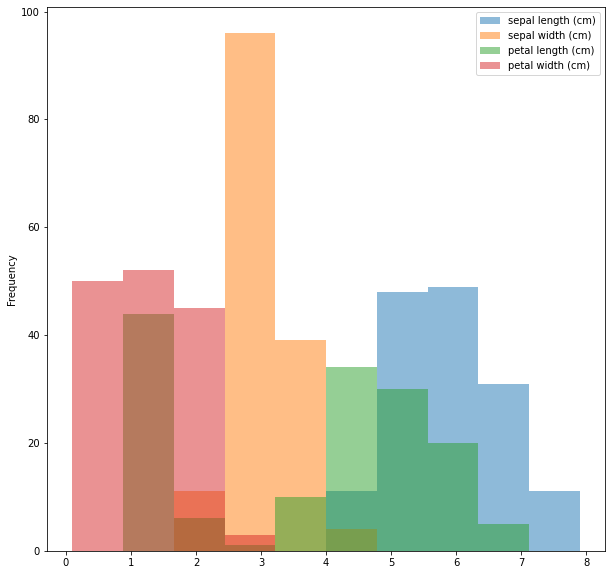

In [3]:
df.drop("target", axis =1).plot.hist(alpha=0.5, figsize = (10, 10));

<AxesSubplot:>

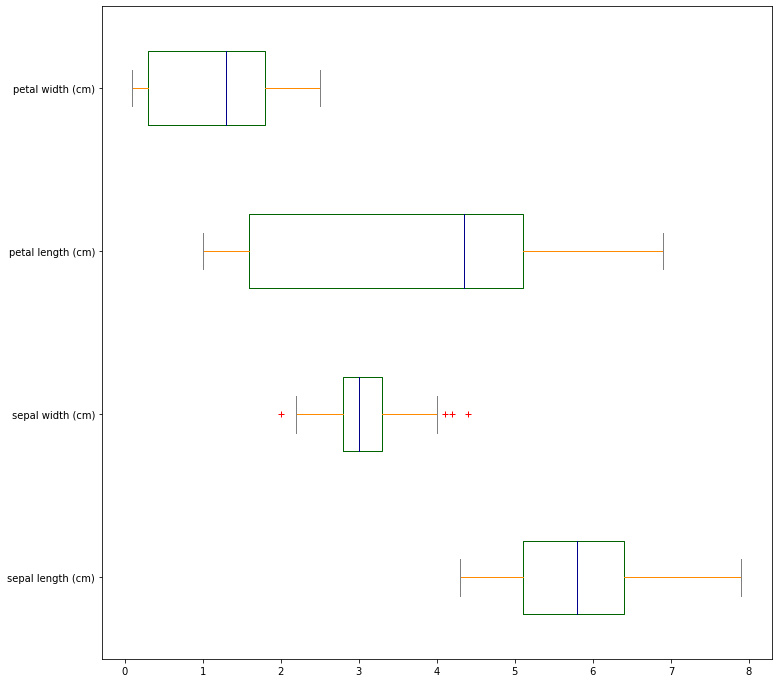

In [4]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
df.drop("target", axis =1).plot.box(vert=False, color=color, sym="r+", figsize = (12, 12))

### Finally I can easily delimit the 3 classes and get some obvious information from the plots, basically the first type is shorter, second normal, and third longer

<AxesSubplot:>

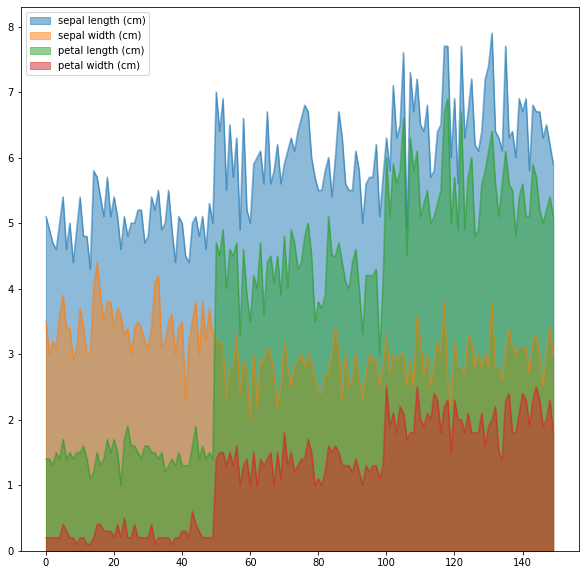

In [5]:
df.drop("target", axis =1).plot.area(stacked=False, figsize = (10, 10))

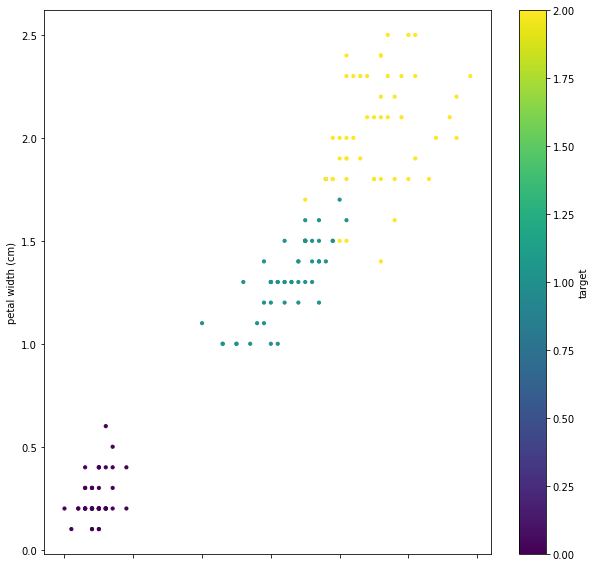

In [6]:
df.plot.scatter(x="petal length (cm)", y="petal width (cm)", c="target", cmap="viridis", s=10, figsize = (10, 10));

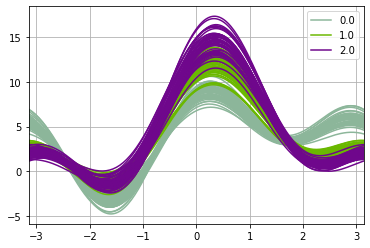

In [7]:
from pandas.plotting import andrews_curves
plt.figure();
andrews_curves(df, "target");

<AxesSubplot:>

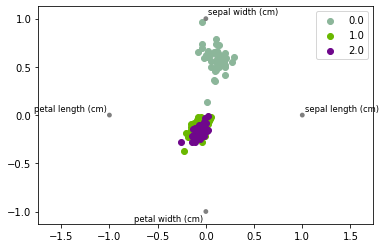

In [8]:
from pandas.plotting import radviz
radviz(df, "target")


### As we can see below, our dataset is perfectly balanced with 50 cases for each type

<AxesSubplot:>

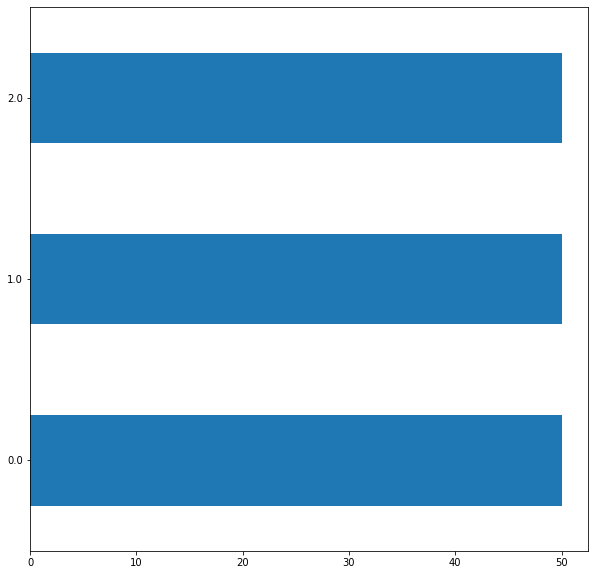

In [9]:
df.target.value_counts().sort_values().plot(kind = 'barh', figsize = (10, 10))

<Figure size 2000x2000 with 0 Axes>

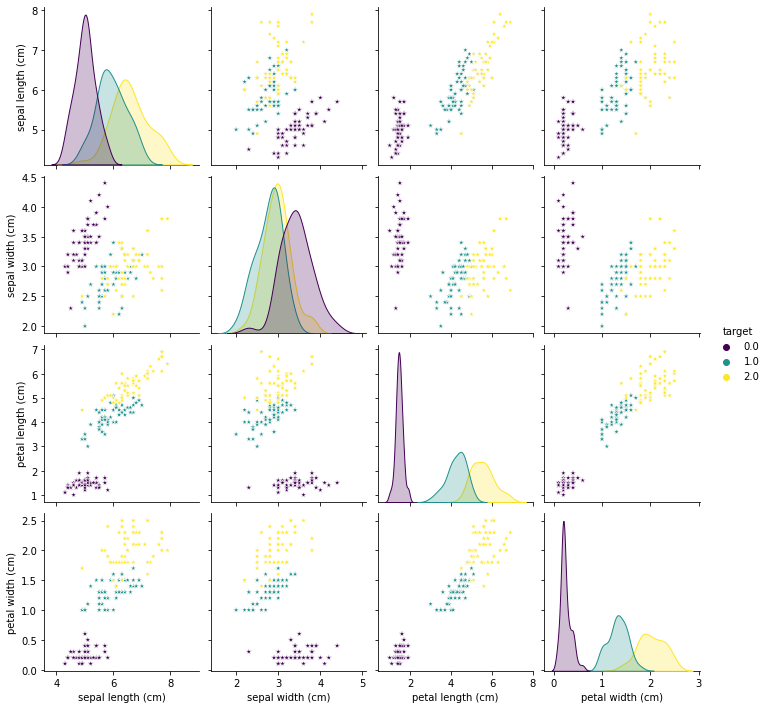

In [10]:
plt.figure(figsize=(25,25), dpi= 80)
g = sns.pairplot(df, hue='target', markers='*', palette = "viridis")
plt.show()

In [11]:
X = df.drop("target", axis = 1)
y = df.target

<AxesSubplot:>

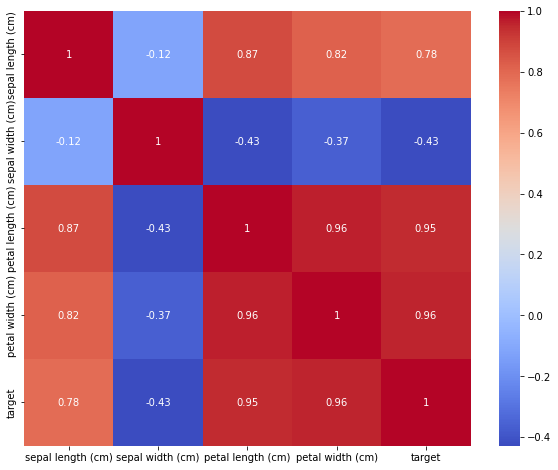

In [12]:
plt.figure(figsize=(10,8))
#Printing the heatmap itself
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

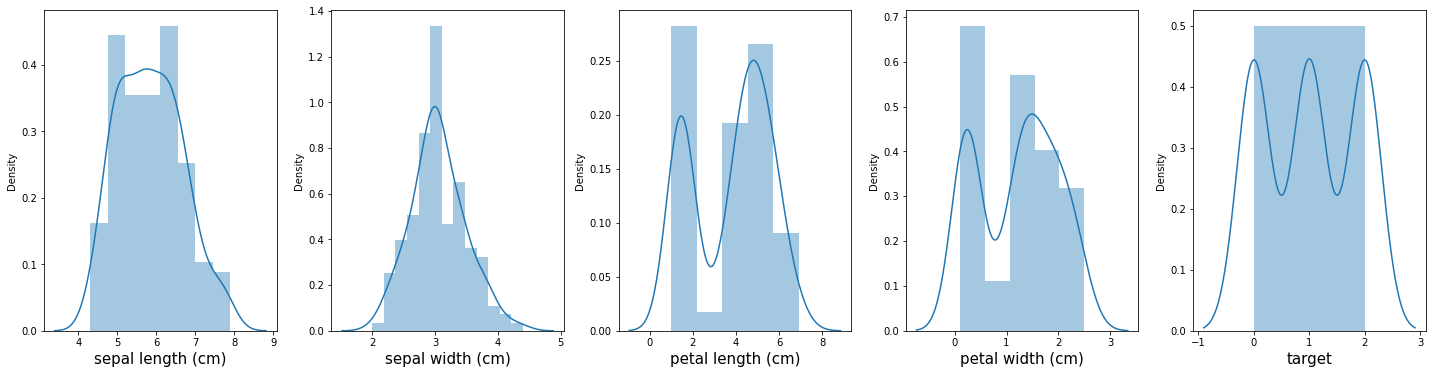

In [13]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

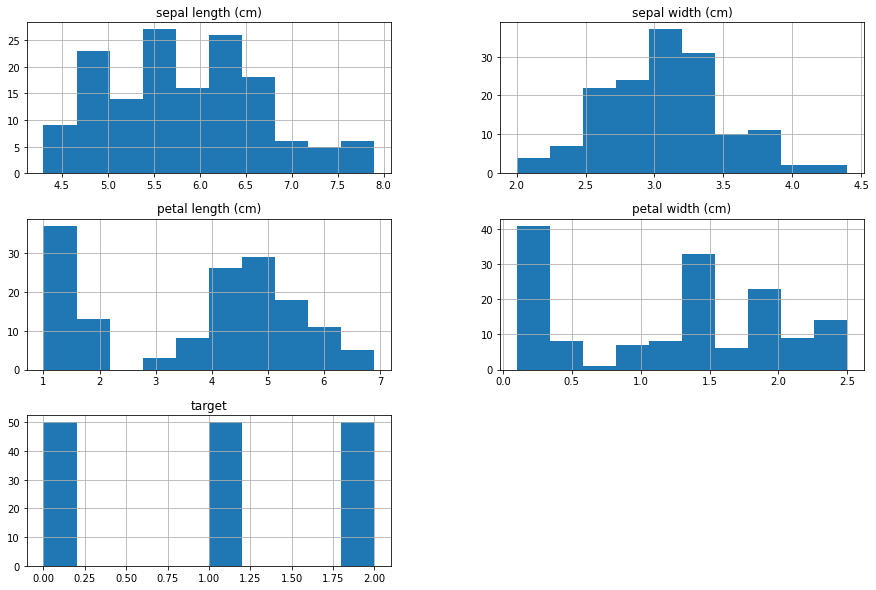

In [14]:
df.hist(figsize=(15, 10))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5, shuffle = True)

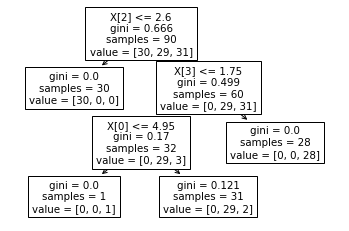

In [16]:
from dtreeviz.trees import *
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


tree.plot_tree(clf);

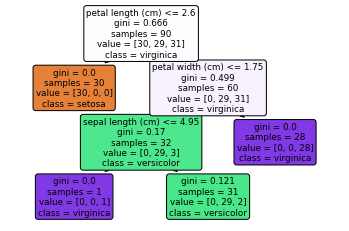

In [17]:

tree.plot_tree(clf,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               rounded=True, 
               filled = True);

C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


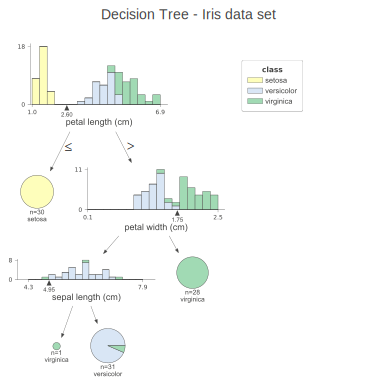

In [18]:
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=iris.feature_names, 
               class_names=list(iris.target_names), 
               title="Decision Tree - Iris data set")
viz

### Turn the fancy mode off)

C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


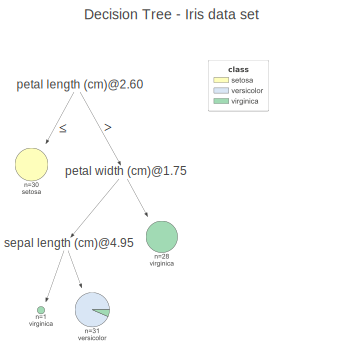

In [19]:
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=iris.feature_names, 
               class_names=list(iris.target_names), 
               title="Decision Tree - Iris data set",
               fancy = False)
viz

C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


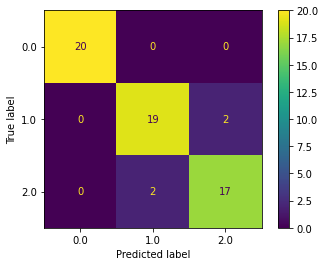

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

In [24]:
from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier(n_jobs=3)
ebm.fit(X_train, y_train)

C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\interpret\glassbox\ebm\ebm.py:922: UserWarning:

Multiclass is still experimental. Subject to change per release.

C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\interpret\glassbox\ebm\ebm.py:925: UserWarning:

Detected multiclass problem: forcing interactions to 0



ExplainableBoostingClassifier(feature_names=['sepal length (cm)',
                                             'sepal width (cm)',
                                             'petal length (cm)',
                                             'petal width (cm)'],
                              feature_types=['continuous', 'continuous',
                                             'continuous', 'continuous'],
                              interactions=0, n_jobs=3)

In [22]:
from interpret import show

global_exp = ebm.explain_global()
show(global_exp)

C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\interpret\visual\udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\interpret\visual\udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\interpret\visual\udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


<!-- http://127.0.0.1:7001/1900886172616/ -->

In [26]:
from lime import lime_tabular 

In [28]:

explainer = lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names = list(df.iloc[:,:-1].columns), 
                                                   class_names = "target",
                                                   verbose = True, 
                                                   mode='classification')

exp = explainer.explain_instance(X_test[2, gauss.predict])
exp.show_in_notebook(show_table = True, show_all = False)

TypeError: '(slice(None, None, None), 0)' is an invalid key

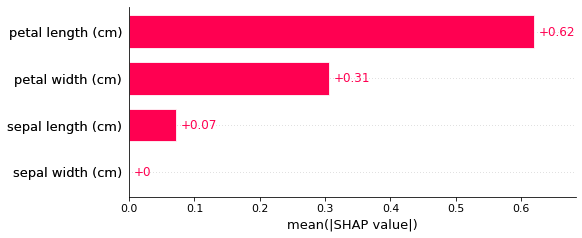

In [31]:
import shap
shap.initjs()

explainer = shap.Explainer(clf.predict, X_train, feature_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"])
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display = 14)


In [29]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
147,6.5,3.0,5.2,2.0
104,6.5,3.0,5.8,2.2
52,6.9,3.1,4.9,1.5
22,4.6,3.6,1.0,0.2
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3
